In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [15]:
dataset = pd.read_csv('D:\DataSets\heart.csv')

In [16]:
dataset.tail(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
905,67,M,NAP,152,212,0,LVH,150,N,0.8,Flat,1
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
907,44,M,ASY,120,169,0,Normal,144,Y,2.8,Down,1
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
dataset.shape

(918, 12)

In [19]:
data = dataset.sample(frac=0.9, random_state=784)
data_unseen = dataset.drop(data.index)
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (826, 12)
Unseen Data For Predictions: (92, 12)


###The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data         for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two               mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are           used to customize the pre-processing pipeline

In [20]:
from pycaret.classification import *
reg = setup(data=data,target =('HeartDisease'),session_id=123
           )

,Description,Value
0,Session id,123
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(826, 12)"
4,Transformed data shape,"(826, 19)"
5,Transformed train set shape,"(578, 19)"
6,Transformed test set shape,"(248, 19)"
7,Ordinal features,2
8,Numeric features,6
9,Categorical features,5


In [21]:
best = compare_models(budget_time = 0.5,cross_validation=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8929,0.9429,0.9155,0.8932,0.9039,0.7830,0.7841,0.4500
ridge,Ridge Classifier,0.8825,0.0000,0.9122,0.8788,0.8950,0.7617,0.7628,0.5370
nb,Naive Bayes,0.8807,0.9299,0.8932,0.8920,0.8915,0.7589,0.7611,0.5320
dt,Decision Tree Classifier,0.8134,0.8122,0.8244,0.8357,0.8283,0.6238,0.6267,0.5390
knn,K Neighbors Classifier,0.6956,0.7427,0.7583,0.7098,0.7311,0.3806,0.3850,0.5180
svm,SVM - Linear Kernel,0.6212,0.0000,0.6871,0.7611,0.6015,0.2299,0.3160,0.5470


In [34]:
print(best)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


(PARAMETER-INCLUDE):pIf you don't want to do horse racing on the entire model library, you can only compare a few models of your choice by using the include parameter..

(PARAMETER - EXCLUDE) :Alternatively, you can also use exclude parameter. This will compare all models except for the ones that are passed in the exclude parameter

In [22]:
best = compare_models(include = ['ridge', 'rf','lr','et','lda','nb'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8997,0.9336,0.9153,0.9060,0.9095,0.7971,0.7998,0.5930
lr,Logistic Regression,0.8929,0.9429,0.9155,0.8932,0.9039,0.7830,0.7841,0.5450
rf,Random Forest Classifier,0.8894,0.9353,0.9311,0.8771,0.9029,0.7748,0.7776,0.5580
ridge,Ridge Classifier,0.8825,0.0000,0.9122,0.8788,0.8950,0.7617,0.7628,0.4430
lda,Linear Discriminant Analysis,0.8808,0.9393,0.9091,0.8785,0.8933,0.7582,0.7592,0.5690
nb,Naive Bayes,0.8807,0.9299,0.8932,0.8920,0.8915,0.7589,0.7611,0.5780


# Create Model

# Extra Trees Classifier

In [23]:
Extra_Trees_Classifier = create_model('et',fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9138,0.9507,0.8750,0.9655,0.9180,0.8276,0.8321
1,0.9138,0.9153,0.8750,0.9655,0.9180,0.8276,0.8321
2,0.8966,0.9357,0.9062,0.9062,0.9062,0.7909,0.7909
3,0.9483,0.9856,1.0000,0.9143,0.9552,0.8943,0.8993
4,0.8448,0.8858,0.8750,0.8485,0.8615,0.6852,0.6856
5,0.9138,0.9123,0.9688,0.8857,0.9254,0.8238,0.8285
6,0.8276,0.8840,0.8750,0.8235,0.8485,0.6489,0.6505
7,0.8966,0.9333,0.8750,0.9333,0.9032,0.7924,0.7943
8,0.9123,0.9473,0.9677,0.8824,0.9231,0.8215,0.8263


# Logistic_Regression

In [52]:
# train Extra Trees
Logistic_Regression= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9310,0.9772,0.9062,0.9667,0.9355,0.8616,0.8636
1,0.8448,0.9099,0.8750,0.8485,0.8615,0.6852,0.6856
2,0.8966,0.9483,0.9062,0.9062,0.9062,0.7909,0.7909
3,0.9138,0.9772,0.9375,0.9091,0.9231,0.8251,0.8256
4,0.8966,0.9050,0.9375,0.8824,0.9091,0.7893,0.7913
5,0.9138,0.9291,0.9375,0.9091,0.9231,0.8251,0.8256
6,0.8103,0.8762,0.8438,0.8182,0.8308,0.6152,0.6156
7,0.8276,0.9363,0.8438,0.8438,0.8438,0.6514,0.6514
8,0.9298,0.9777,0.9677,0.9091,0.9375,0.8577,0.8599


# Random forest classifier

In [53]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9138,0.9597,0.9062,0.9355,0.9206,0.8263,0.8268
1,0.8448,0.9195,0.8750,0.8485,0.8615,0.6852,0.6856
2,0.8276,0.9327,0.9062,0.8056,0.8529,0.6463,0.6529
3,0.9655,0.9844,1.0000,0.9412,0.9697,0.9298,0.9321
4,0.8621,0.9008,0.9062,0.8529,0.8788,0.7191,0.7209
5,0.9310,0.9171,0.9688,0.9118,0.9394,0.8596,0.8617
6,0.8103,0.8750,0.8750,0.8000,0.8358,0.6124,0.6158
7,0.8793,0.9249,0.9062,0.8788,0.8923,0.7551,0.7556
8,0.8947,0.9435,0.9677,0.8571,0.9091,0.7852,0.7934


# Ridge Classifier

In [54]:
ridge= create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8966,0.0000,0.9062,0.9062,0.9062,0.7909,0.7909
1,0.8103,0.0000,0.8438,0.8182,0.8308,0.6152,0.6156
2,0.8621,0.0000,0.9062,0.8529,0.8788,0.7191,0.7209
3,0.9310,0.0000,0.9688,0.9118,0.9394,0.8596,0.8617
4,0.8966,0.0000,0.9375,0.8824,0.9091,0.7893,0.7913
5,0.9310,0.0000,0.9688,0.9118,0.9394,0.8596,0.8617
6,0.8103,0.0000,0.8438,0.8182,0.8308,0.6152,0.6156
7,0.8448,0.0000,0.8438,0.8710,0.8571,0.6874,0.6878
8,0.9123,0.0000,0.9355,0.9062,0.9206,0.8227,0.8232


# Naive Bayes

In [55]:
Naive_Bayes = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9310,0.9880,0.8750,1.0000,0.9333,0.8626,0.8708
1,0.7931,0.8474,0.8438,0.7941,0.8182,0.5787,0.5801
2,0.8966,0.9291,0.9062,0.9062,0.9062,0.7909,0.7909
3,0.9310,0.9880,0.9688,0.9118,0.9394,0.8596,0.8617
4,0.8966,0.9062,0.9375,0.8824,0.9091,0.7893,0.7913
5,0.8966,0.9255,0.9062,0.9062,0.9062,0.7909,0.7909
6,0.7931,0.8810,0.7500,0.8571,0.8000,0.5877,0.5933
7,0.8621,0.9099,0.9062,0.8529,0.8788,0.7191,0.7209
8,0.9123,0.9777,0.9355,0.9062,0.9206,0.8227,0.8232


# Tuned Model

In [32]:
tuned_Extra_Trees_Classifier=tune_model(Extra_Trees_Classifier,return_train_score = True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Logistic Regression

In [57]:
tuned_lr = tune_model(Logistic_Regression,return_train_score = True)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Random Forest Classifiers

In [61]:
tuned_rf = tune_model(rf,n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9138,0.9772,0.9062,0.9355,0.9206,0.8263,0.8268
1,0.8103,0.9171,0.8750,0.8000,0.8358,0.6124,0.6158
2,0.8448,0.9435,0.9062,0.8286,0.8657,0.6829,0.6867
3,0.9310,0.9772,0.9688,0.9118,0.9394,0.8596,0.8617
4,0.8793,0.9135,0.9375,0.8571,0.8955,0.7533,0.7576
5,0.9310,0.9111,0.9688,0.9118,0.9394,0.8596,0.8617
6,0.8276,0.8774,0.9062,0.8056,0.8529,0.6463,0.6529
7,0.8793,0.9195,0.9062,0.8788,0.8923,0.7551,0.7556
8,0.9298,0.9690,0.9677,0.9091,0.9375,0.8577,0.8599


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Ridge Classifier

In [63]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8966,0.0000,0.9062,0.9062,0.9062,0.7909,0.7909
1,0.8276,0.0000,0.8438,0.8438,0.8438,0.6514,0.6514
2,0.8621,0.0000,0.9062,0.8529,0.8788,0.7191,0.7209
3,0.9310,0.0000,0.9688,0.9118,0.9394,0.8596,0.8617
4,0.8966,0.0000,0.9375,0.8824,0.9091,0.7893,0.7913
5,0.9310,0.0000,0.9688,0.9118,0.9394,0.8596,0.8617
6,0.8103,0.0000,0.8438,0.8182,0.8308,0.6152,0.6156
7,0.8448,0.0000,0.8438,0.8710,0.8571,0.6874,0.6878
8,0.9123,0.0000,0.9355,0.9062,0.9206,0.8227,0.8232


Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Decision Tree Classifier

In [64]:
Naive_Bayes = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9310,0.9880,0.8750,1.0000,0.9333,0.8626,0.8708
1,0.7931,0.8474,0.8438,0.7941,0.8182,0.5787,0.5801
2,0.8966,0.9291,0.9062,0.9062,0.9062,0.7909,0.7909
3,0.9310,0.9880,0.9688,0.9118,0.9394,0.8596,0.8617
4,0.8966,0.9062,0.9375,0.8824,0.9091,0.7893,0.7913
5,0.8966,0.9255,0.9062,0.9062,0.9062,0.7909,0.7909
6,0.7931,0.8810,0.7500,0.8571,0.8000,0.5877,0.5933
7,0.8621,0.9099,0.9062,0.8529,0.8788,0.7191,0.7209
8,0.9123,0.9777,0.9355,0.9062,0.9206,0.8227,0.8232


##Metrics alone are not the only criteria you should consider when finalizing the best model for production. Other factors to consider include training time, standard deviation of k-folds etc.

# Plot a Model

# Ensemble Model

In [34]:
ensemble_model=ensemble_model(tuned_Extra_Trees_Classifier, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9310,0.9585,0.9062,0.9667,0.9355,0.8616,0.8636
1,0.8966,0.9177,0.8750,0.9333,0.9032,0.7924,0.7943
2,0.8793,0.9165,0.9062,0.8788,0.8923,0.7551,0.7556
3,0.9483,0.9928,1.0000,0.9143,0.9552,0.8943,0.8993
4,0.8621,0.9056,0.9062,0.8529,0.8788,0.7191,0.7209
5,0.9138,0.9153,0.9688,0.8857,0.9254,0.8238,0.8285
6,0.8276,0.8906,0.8750,0.8235,0.8485,0.6489,0.6505
7,0.9138,0.9393,0.8750,0.9655,0.9180,0.8276,0.8321
8,0.8947,0.9529,0.9355,0.8788,0.9062,0.7865,0.7885


# Blend Models

In [35]:
best_recall_models_top3 = compare_models(sort = 'Accuracy', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8997,0.9336,0.9153,0.9060,0.9095,0.7971,0.7998,0.6050
lr,Logistic Regression,0.8929,0.9429,0.9155,0.8932,0.9039,0.7830,0.7841,0.4530
rf,Random Forest Classifier,0.8894,0.9353,0.9311,0.8771,0.9029,0.7748,0.7776,0.5880
ridge,Ridge Classifier,0.8825,0.0000,0.9122,0.8788,0.8950,0.7617,0.7628,0.5420
lda,Linear Discriminant Analysis,0.8808,0.9393,0.9091,0.8785,0.8933,0.7582,0.7592,0.5540
nb,Naive Bayes,0.8807,0.9299,0.8932,0.8920,0.8915,0.7589,0.7611,0.5420
lightgbm,Light Gradient Boosting Machine,0.8791,0.9306,0.9059,0.8792,0.8917,0.7548,0.7567,0.5780
ada,Ada Boost Classifier,0.8790,0.9184,0.9029,0.8823,0.8912,0.7550,0.7579,0.5750
gbc,Gradient Boosting Classifier,0.8773,0.9398,0.9092,0.8752,0.8907,0.7509,0.7541,0.5760
dt,Decision Tree Classifier,0.8134,0.8122,0.8244,0.8357,0.8283,0.6238,0.6267,0.5380


In [36]:
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        

In [37]:
# blend models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8966,0.9736,0.8750,0.9333,0.9032,0.7924,0.7943
1,0.8621,0.9183,0.8750,0.8750,0.8750,0.7212,0.7212
2,0.8621,0.9435,0.9062,0.8529,0.8788,0.7191,0.7209
3,0.9483,0.9808,1.0000,0.9143,0.9552,0.8943,0.8993
4,0.8793,0.9002,0.9375,0.8571,0.8955,0.7533,0.7576
5,0.9310,0.9159,0.9688,0.9118,0.9394,0.8596,0.8617
6,0.8276,0.8798,0.8750,0.8235,0.8485,0.6489,0.6505
7,0.8793,0.9327,0.9062,0.8788,0.8923,0.7551,0.7556
8,0.9123,0.9640,0.9677,0.8824,0.9231,0.8215,0.8263


VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                                                   oob_score=False,
                                                   ra...
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [38]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8966,0.9748,0.8750,0.9333,0.9032,0.7924,0.7943
1,0.8448,0.9111,0.8750,0.8485,0.8615,0.6852,0.6856
2,0.8793,0.9447,0.9062,0.8788,0.8923,0.7551,0.7556
3,0.9138,0.9820,0.9375,0.9091,0.9231,0.8251,0.8256
4,0.8793,0.9038,0.9062,0.8788,0.8923,0.7551,0.7556
5,0.9310,0.9291,0.9688,0.9118,0.9394,0.8596,0.8617
6,0.8103,0.8846,0.8438,0.8182,0.8308,0.6152,0.6156
7,0.8276,0.9363,0.8438,0.8438,0.8438,0.6514,0.6514
8,0.9123,0.9739,0.9677,0.8824,0.9231,0.8215,0.8263


StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=F...
                                                       random_state=123,
                                                       verbose=0,
                                                       warm_start=False))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

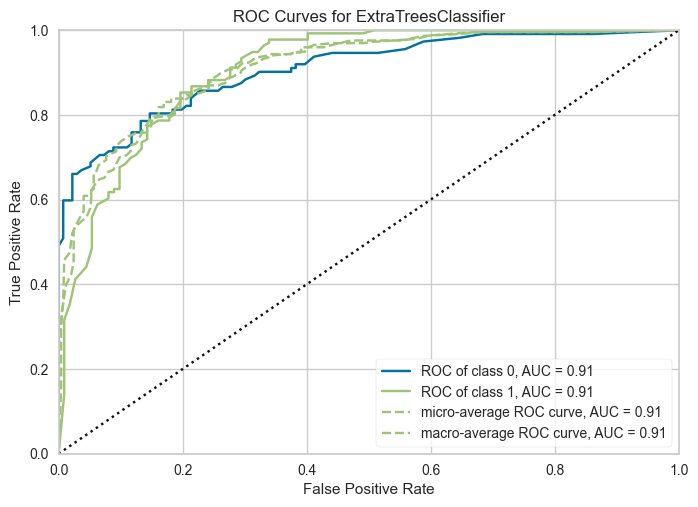

In [74]:
plot_model(tuned_Extra_Trees_Classifier)

# Residual Plot

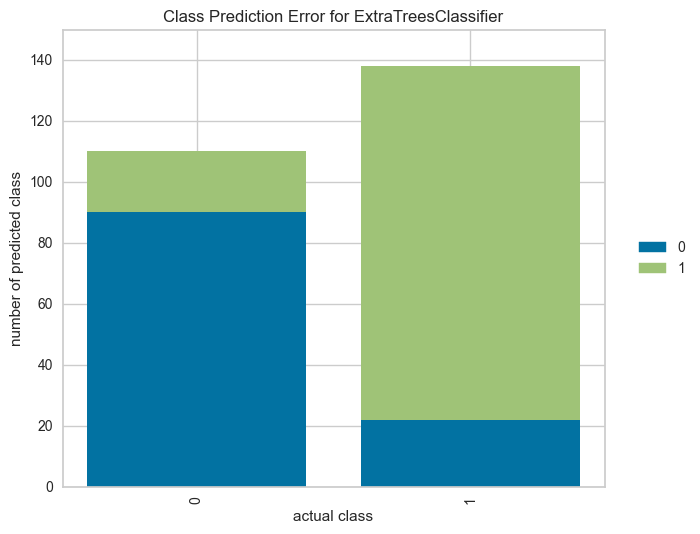

In [39]:
plot_model(tuned_Extra_Trees_Classifier,plot = 'error')

# Precision-Recall Curve

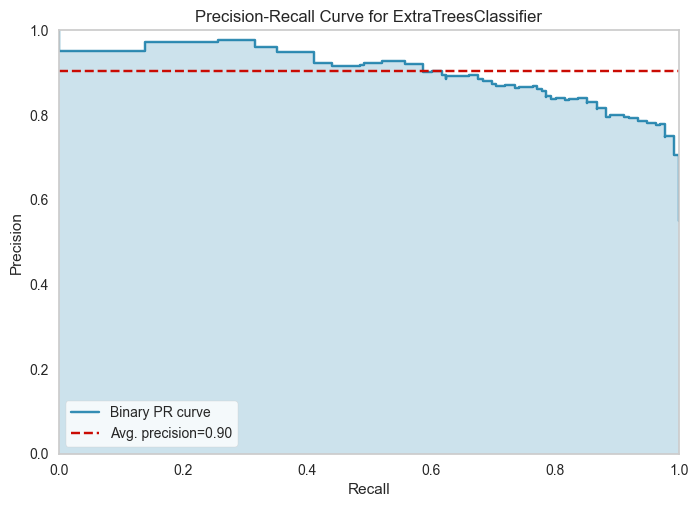

In [76]:
plot_model(tuned_Extra_Trees_Classifier, plot = 'pr')

# Feature Importance Plot

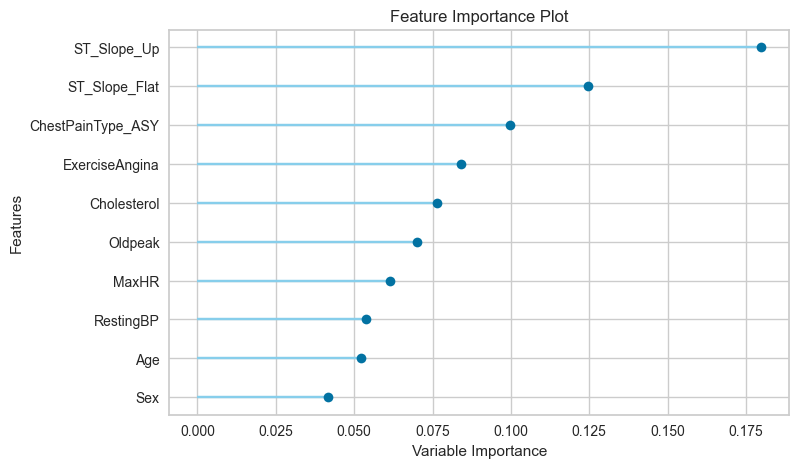

In [77]:
plot_model(tuned_Extra_Trees_Classifier, plot='feature')

# Confusion Matrix

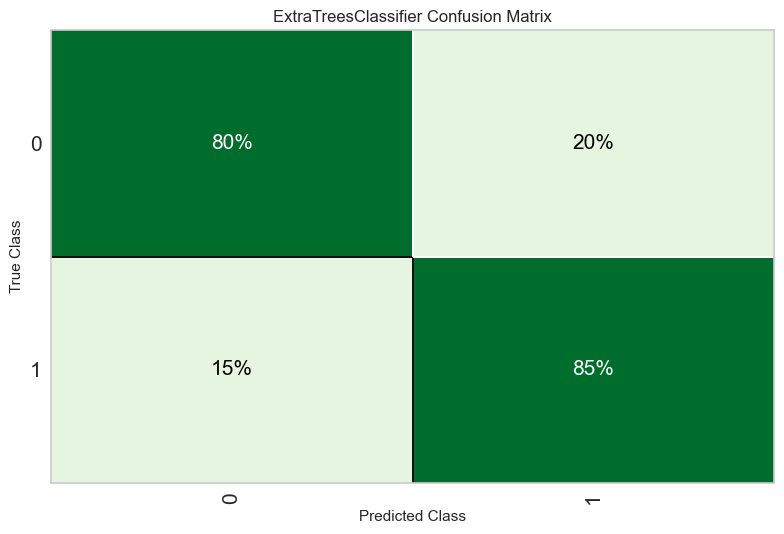

In [40]:
plot_model(tuned_Extra_Trees_Classifier, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

# Model Evaluate

In [41]:
evaluate_model(tuned_Extra_Trees_Classifier)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [42]:
predict_model(tuned_Extra_Trees_Classifier);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8306,0.9069,0.8529,0.8406,0.8467,0.6575,0.6576


# Finalize Model for Deployment

In [44]:
final_et = finalize_model(tuned_Extra_Trees_Classifier)
#Final Random Forest model parameters for deployment
print(final_et)

Pipeline(memory=FastMemory(location=C:\Users\MAMUN~1.DES\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'RestingBP', 'Cholesterol',
                                             'FastingBS', 'MaxHR', 'Oldpeak'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              v...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_we

Caution: One final word of caution. Once the model is finalized using finalize_model(), the entire dataset including the test/hold-out set is used for training. As such, if the model is used for predictions on the hold-out set after finalize_model() is used, the information grid printed will be misleading as you are trying to predict on the same data that was used for modeling. In order to demonstrate this point only, we will use final_rf under predict_model() to compare the information grid with the one above in section 11

In [60]:
predict_model(final_et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# Predict on unseen data

In [49]:
# predict_model() function is also used to predict on the unseen dataset.

unseen_prediction= predict_model(final_et,data=data_unseen)
unseen_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8152,0.8718,0.8704,0.8246,0.8468,0.6144,0.6158


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,prediction_label,prediction_score
0,39,M,ATA,120,204,0,Normal,145,N,0.0,Up,0,0,1.00
1,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1,1,0.88
2,42,F,NAP,115,211,0,ST,137,N,0.0,Up,0,0,1.00
3,54,F,ATA,120,273,0,Normal,150,N,1.5,Flat,0,1,0.69
4,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1,1,1.00


In [51]:
from pycaret.utils import check_metric
check_metric(unseen_prediction['HeartDisease'], unseen_prediction['Label'], metric = 'Accuracy')

ImportError: cannot import name 'check_metric' from 'pycaret.utils' (C:\Users\Mamun.DESKTOP-L578G6J\anaconda3\envs\pycaret\lib\site-packages\pycaret\utils\__init__.py)